In [95]:
! pip show streamlit

Name: streamlit
Version: 1.2.0
Summary: The fastest way to build data apps in Python
Home-page: https://streamlit.io
Author: Streamlit Inc
Author-email: hello@streamlit.io
License: Apache 2
Location: /Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages
Requires: altair, astor, attrs, base58, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, pympler, python-dateutil, requests, toml, tornado, tzlocal, validators
Required-by: 


In [1]:
import streamlit as st

In [2]:
import numpy as np
import pandas as pd

st.markdown("""# This is a header
## This is a sub header
This is text""")

df = pd.DataFrame({
          'first column': list(range(1, 11)),
          'second column': np.arange(10, 101, 10)
        })

# this slider allows the user to select a number of lines
# to display in the dataframe
# the selected value is returned by st.slider
line_count = st.slider('Select a line count', 1, 10, 3)

# and used in order to select the displayed lines
head_df = df.head(line_count)

head_df

2021-12-06 17:14:01.841 
  command:

    streamlit run /Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


,first column,second column
0,1,10
1,2,20
2,3,30


In [5]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)

# Classification

In [24]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
data = pd.read_csv('../small_business/data/restaurants.csv')
data = data.drop(columns = 'Unnamed: 0')

In [26]:
X = data.drop(columns=['rating','name', 'address', 'label', 'postal_code', 'no_del_exp', 'municipality', 'review_count'])
y = data['rating']

In [27]:
y.describe()

count    652.000000
mean       4.390644
std        0.363447
min        1.000000
25%        4.200000
50%        4.400000
75%        4.600000
max        5.000000
Name: rating, dtype: float64

In [28]:
y_class=pd.cut(x=y, bins=[0,4, 5], 
                        labels=[ "below_average", "above average"])

In [29]:
y_class.value_counts()

above average    573
below_average     79
Name: rating, dtype: int64

(array([  1.,   0.,   0.,   1.,   3.,   8.,  21.,  83., 312., 223.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

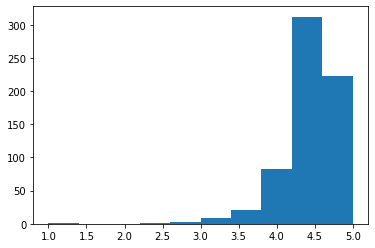

In [30]:
import matplotlib.pyplot as plt
plt.hist(y)

In [31]:
X_train, X_test, yc_train, yc_test = train_test_split(X, y_class, test_size=0.30, random_state=42)

In [32]:
price_transformer = SimpleImputer(strategy="most_frequent")
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preproc_basic = make_column_transformer((price_transformer, ['price']),
                                       (cat_transformer, ['neighborhood', 'type']), remainder='passthrough')

preproc = make_pipeline( preproc_basic)


In [33]:
X_train_t = preproc.fit_transform(X_train)

In [34]:
print(yc_train)

450    above average
212    above average
9      above average
299    above average
302    above average
           ...      
71     above average
106    below_average
270    above average
435    above average
102    above average
Name: rating, Length: 456, dtype: category
Categories (2, object): ['below_average' < 'above average']


In [35]:
models= {'KNN':{'model':KNeighborsClassifier(),
               'params':{'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8, 9], 'weights':['uniform', 'distance']}},
        'RandomForest':{'model':RandomForestClassifier(class_weight='balanced'),
                        'params':{'n_estimators':[50, 100]}},
         'SVC':{'model':SVC(class_weight='balanced'), 
                'params':{'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[0.1, 0.5, 1, 2,3]}},
        'boosters':{'model':XGBClassifier(), 'params': {'max_depth':[5, 10, 20, 50],  'n_estimators': [10, 50, 100, 150], 'learning_rate':[0.01, 0.1, 1]}
        }}

best = {}      
for key, value in models.items():
    grid_search = GridSearchCV(value['model'], param_grid= value['params'],
                               cv=5, scoring="f1_macro", n_jobs = -1)
    grid_search.fit(X_train_t, yc_train)
    best[key] = {'params':grid_search.best_params_,
                  'score':grid_search.best_score_}

[16:38:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [36]:
best

{'KNN': {'params': {'n_neighbors': 5, 'weights': 'uniform'},
  'score': 0.5931950004348227},
 'RandomForest': {'params': {'n_estimators': 50}, 'score': 0.5781246959985443},
 'SVC': {'params': {'C': 0.1, 'kernel': 'linear'}, 'score': 0.538010189353279},
 'boosters': {'params': {'learning_rate': 0.1,
   'max_depth': 20,
   'n_estimators': 50},
  'score': 0.5932059660327956}}

In [37]:
pipe = make_pipeline(preproc)
pipe

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['price']),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['neighborhood',
                                                                    'type'])]))]))])

In [38]:
import numpy as np
probs = []
def thresholdsvm(probabilities):
    for i in probabilities[:,0]:
        if i< 0.875:
            probs.append('below_average')  
        else:
            probs.append('above average')

    return np.array(probs)
        

In [39]:
probsknn = []
def thresholdknn(probabilities):
    for i in probabilities[:,0]:
        if i< 0.8:
            probsknn.append('below_average')  
        else:
            probsknn.append('above average')

    return np.array(probsknn)

In [40]:
probsxgb = []
def thresholdxgb(probabilities):
    for i in probabilities[:,0]:
        if i< 0.9:
            probsxgb.append('below_average')  
        else:
            probsxgb.append('above average')

    return np.array(probsxgb)

/Users/louisecaucheteux/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:38:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
               precision    recall  f1-score   support

above average       0.93      0.70      0.80       176
below_average       0.17      0.55      0.27        20

     accuracy                           0.69       196
    macro avg       0.55      0.63      0.53       196
 weighted avg       0.86      0.69      0.75       196



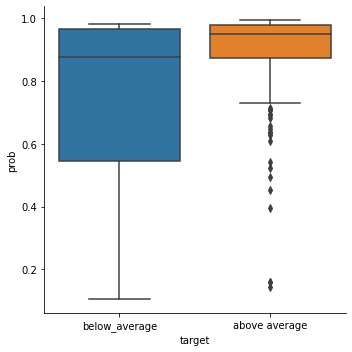

In [41]:
xgb = XGBClassifier(learning_rate = 0.1, max_depth= 20, n_estimators =50)
xgb.fit(pipe.fit_transform(X_train),yc_train)
y_predxgb = xgb.predict(pipe.transform(X_test))
y_probxgb = xgb.predict_proba(pipe.transform(X_test))
res = pd.DataFrame({'prob': y_probxgb[:,0],
                   'target':yc_test})
sns.catplot(data = res, x = 'target', y = 'prob', kind = 'box')
thresholdxgb(y_probxgb)
print(classification_report(yc_test, probsxgb))

In [79]:
X_test[0:1]

,type,price,latitude,longitude,dine_in,takeaway,delivery,drive_through,curb_pickup,neighborhood
639,mexican,2,38.715687,-9.146375,1,1,1,0,0,Encarnação


In [85]:
new_X

,type,price,latitude,longitude,dine_in,takeway,delivery,drive_through,curb_pickup,neighborhood
0,mexican,2,0,0,1,1,1,1,1,Encarnação


In [66]:
new_row = {'type':'mexican', 'neigborhood': 'Encarnação'}
#append row to the dataframe
#df_marks = df_marks.append(new_row, ignore_index=True)

In [86]:
new_X=pd.DataFrame(columns=['type','price','latitude','longitude', 'dine_in', 'takeway','delivery', 'drive_through', 'curb_pickup', 'neighborhood'])
new_row = {'type':'mexican', 'price': 2, 'latitude':'0','longitude':'0', 'takeaway':1,'dine_in':1,'delivery':1, 'drive_through':1, 'curb_pickup':1, 'neighborhood': 'Encarnação' }
new_X=new_X.append(new_row, ignore_index=True)

In [89]:
pd.DataFrame({'type':'mexican', 'price': 2, 'latitude':'0','longitude':'0', 'takeaway':1,'dine_in':1,'delivery':1, 'drive_through':1, 'curb_pickup':1, 'neighborhood': 'Encarnação' })

ValueError: If using all scalar values, you must pass an index

In [88]:
y_predknn = knn.predict(pipe.transform(new_X))
#y_predknn = knn.predict(pipe.transform(X_test[0:1]))


               precision    recall  f1-score   support

above average       0.94      0.91      0.93       176
below_average       0.38      0.45      0.41        20

     accuracy                           0.87       196
    macro avg       0.66      0.68      0.67       196
 weighted avg       0.88      0.87      0.87       196



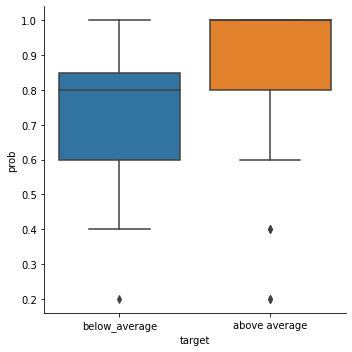

In [63]:
knn = KNeighborsClassifier(n_neighbors = 5,weights= 'uniform' )
knn.fit(pipe.fit_transform(X_train),yc_train)
y_predknn = knn.predict(pipe.transform(X_test))
y_probknn = knn.predict_proba(pipe.transform(X_test))
res = pd.DataFrame({'prob': y_probknn[:,0],
                   'target':yc_test})
sns.catplot(data = res, x = 'target', y = 'prob', kind = 'box')
thresholdknn(y_probknn)
print(classification_report(yc_test, probsknn))

               precision    recall  f1-score   support

above average       0.95      0.65      0.77       176
below_average       0.19      0.70      0.29        20

     accuracy                           0.66       196
    macro avg       0.57      0.68      0.53       196
 weighted avg       0.87      0.66      0.73       196



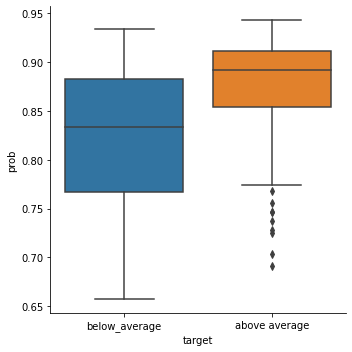

In [38]:
svm = SVC(C= 0.1, class_weight='balanced', probability = True, kernel = 'linear')
svm.fit(pipe.fit_transform(X_train),yc_train)
y_pred = svm.predict(pipe.transform(X_test))
y_prob = svm.predict_proba(pipe.transform(X_test))
res = pd.DataFrame({'prob': y_prob[:,0],
                   'target':yc_test})
sns.catplot(data = res, x = 'target', y = 'prob', kind = 'box')
thresholdsvm(y_prob)
print(classification_report(yc_test,probs))

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy =', round(accuracy_score(yc_test, y_pred), 2)) # Accuracy

print('Precision =', round(precision_score(yc_test, y_pred, average='weighted'), 2)) # Precision

print('Recall =', round(recall_score(yc_test, y_pred, average='weighted'), 2)) # Recall

print('F1 score =', round(f1_score(yc_test, y_pred, average='weighted'), 2)) # F1 score

Accuracy = 0.74
Precision = 0.87
Recall = 0.74
F1 score = 0.79


## Find nearest neighbours 

In [45]:
knn.kneighbors(X_train_t[5], return_distance=False)

array([[  5,  17, 373, 416, 253]])

### Function prediction 